In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
a = np.random.multivariate_normal([-2, -2], [[1.0, 0], [0, 1.]], 50).T
b = np.random.multivariate_normal([2, -2], [[.5, 0], [0, 0.5]], 50).T
c = np.random.multivariate_normal([2, 3], [[1.0, 0], [0, 1.5]], 50).T

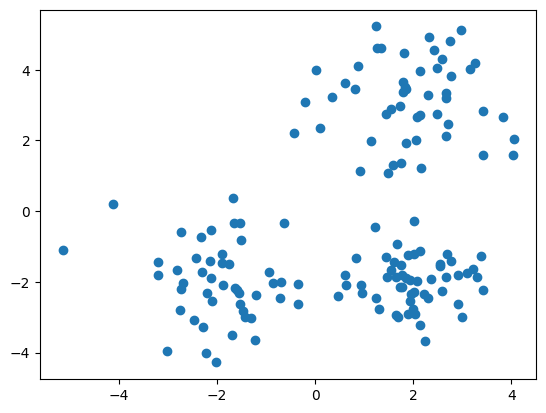

In [3]:
X = np.hstack([a, b, c])
plt.scatter(X[0], X[1])

In [4]:
# k-means implementation

In [8]:
np.random.choice(1,len(X), 3)

array([0, 0])

In [20]:
##X[2,3,4]

In [12]:
np.mean([[1, 2],[1,3],[1,4]], axis=0)

array([1., 3.])

In [13]:
np.linalg.norm(np.array([0, 0]) - np.array([1, 1]))

1.4142135623730951

In [17]:
def distance(u, v):
    '''
        return L2 distance (sqrt (x1-x2)^2 + (y1 - y2)^2
    '''
    return np.linalg.norm(u - v)


def calculate_centroid(points):
    '''
    Mean of all the points
    '''
    return np.mean(points, axis=0)

def get_closest_cluster(point, centroids):

    return np.argsort([distance(point, centroid) for centroid in centroids])[0]

    

def k_means(points, k, max_error=0.01, max_iterations=100):

    n = len(points)
    points_to_cluster = [0] * n
    
    # Initialize centroid - k random points
    centroids = np.random.randint(low=0, high=n, size=k)
    cluster_to_centroid = points[centroids]

    while max_iterations > 0:
        max_iterations -= 1

        cluster_to_points = [[] for _ in range(k)]
        
        for j in range(n):
            i = get_closest_cluster(points[j], cluster_to_centroid)
            points_to_cluster[j] = i
            cluster_to_points[i].append(j)

        # Recalculate the centroid
        for i, points_i in enumerate(cluster_to_points):
            cluster_to_centroid[i] = calculate_centroid(points[points_i])

    return points_to_cluster

points = X.T
point_to_cluster = k_means(points, k=3)

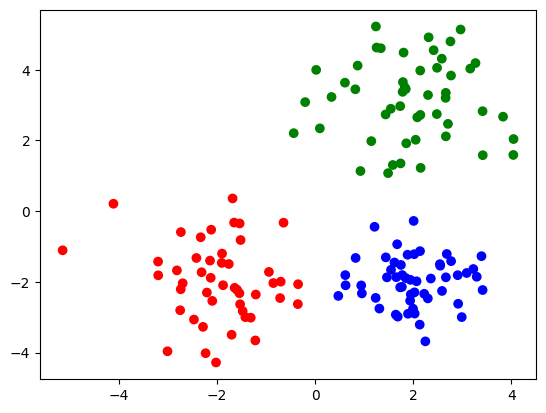

In [19]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(X[0], X[1], c=colormap[point_to_cluster])